In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("VNL2023.csv")

In [3]:
df.head()

,Player,Country,Age,Attack,Block,Serve,Set,Dig,Receive,Position
0,Ichikawa Yuki,Japan,28,15.80,1.13,1.40,0.07,4.80,5.60,OH
1,Romano Yuri,Italy,26,12.33,1.07,1.47,0.00,3.87,0.00,OP
2,Abdel-Aziz Nimir,Nederland,31,15.33,0.67,2.08,0.00,3.17,0.25,OP
3,Herrera Jaime Jesus,Cuba,28,15.00,0.92,1.75,0.00,3.33,0.17,OP
4,Takahashi Ran,Japan,22,11.53,0.67,1.00,0.07,6.40,5.07,OH


In [6]:
#shape function shows output as (number of rows, number of culumns)
df.shape

(131, 10)

In [7]:
df.describe()

,Age,Attack,Block,Serve,Set,Dig,Receive
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,27.809160,5.642672,0.845573,0.535802,2.192595,3.428397,1.684198
std,4.186268,4.256229,0.700896,0.454346,6.031587,2.077823,1.989939
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.530000,0.000000
25%,25.000000,2.800000,0.370000,0.240000,0.000000,1.920000,0.000000
50%,27.000000,5.170000,0.690000,0.420000,0.000000,3.000000,0.330000
75%,30.000000,8.600000,1.140000,0.760000,0.000000,4.510000,3.385000
max,41.000000,15.800000,4.080000,2.080000,26.890000,11.440000,6.690000


In [10]:
# Use .sum() to add up the columns and get the results as a while instead cell by cell
df.isna().sum()

Player      0
Country     0
Age         0
Attack      0
Block       0
Serve       0
Set         0
Dig         0
Receive     0
Position    0
dtype: int64

In [13]:
# Finds duplicated rows
df.duplicated().sum()

np.int64(0)

In [16]:
# Finding numeric columns in data
numeric_cols = df.select_dtypes(include = ["int", "float"]).columns
print(numeric_cols)
# Finding correlation between numeric data
corr_matrix = df[numeric_cols].corr()
print(corr_matrix)

Index(['Age', 'Attack', 'Block', 'Serve', 'Set', 'Dig', 'Receive'], dtype='object')
              Age    Attack     Block     Serve       Set       Dig   Receive
Age      1.000000 -0.177849 -0.101040 -0.108367  0.177757  0.167141 -0.011067
Attack  -0.177849  1.000000  0.338412  0.768859 -0.430805 -0.098999  0.169892
Block   -0.101040  0.338412  1.000000  0.335954 -0.132019 -0.348347 -0.265206
Serve   -0.108367  0.768859  0.335954  1.000000 -0.154815 -0.052501  0.039642
Set      0.177757 -0.430805 -0.132019 -0.154815  1.000000  0.131659 -0.305869
Dig      0.167141 -0.098999 -0.348347 -0.052501  0.131659  1.000000  0.624733
Receive -0.011067  0.169892 -0.265206  0.039642 -0.305869  0.624733  1.000000


Text(0.5, 1.0, 'Correlation Matrix Heatmap')

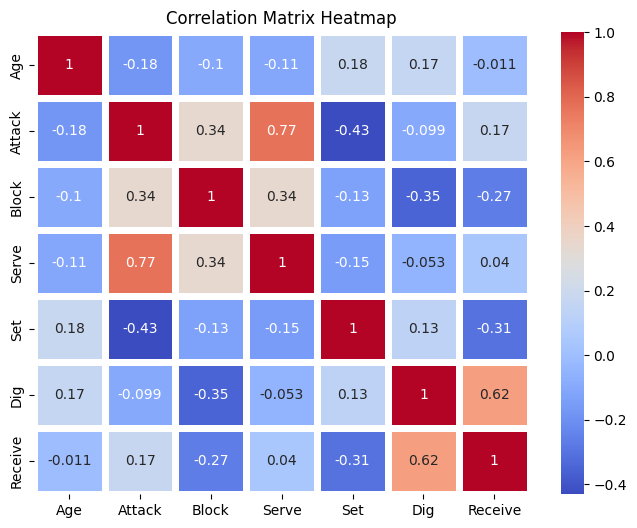

In [19]:
#create a heat map showing the correlations
plt.figure(figsize=(8, 6)) #changes the size of the plot
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=5)
plt.title("Correlation Matrix Heatmap")

In [22]:
position_counts = df["Position"].value_counts()
print(position_counts)

Position
OH    42
MB    32
OP    25
S     16
L     16
Name: count, dtype: int64


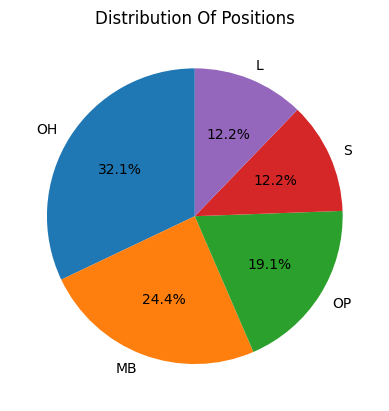

In [23]:
plt.pie(position_counts, labels=position_counts.index, autopct="%1.1f%%", startangle=90)
plt.title("Distribution Of Positions")
plt.show()

In [28]:
# Calculating Average Attack by Country
avg_attack_by_country = df.groupby("Country")["Attack"].mean().sort_values(ascending=False)
print(avg_attack_by_country)

Country
France       6.670000
Japan        6.595000
Cuba         6.344286
Serbia       5.998750
Italy        5.965000
Slovenia     5.961250
Argentina    5.925000
Nederland    5.880000
Poland       5.807000
Canada       5.405714
Bulgaria     5.282500
Brazil       5.250000
China        5.093750
Germany      4.833750
Iran         4.707778
USA          4.600000
Name: Attack, dtype: float64


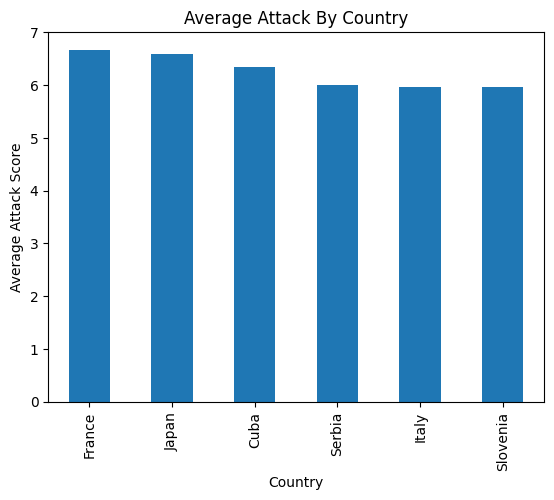

In [32]:
#Showing the top 6 countries with the highest Average Attack
avg_attack_by_country.head(6).plot(kind="bar")
plt.title("Average Attack By Country")
plt.xlabel("Country")
plt.ylabel("Average Attack Score")
plt.show()

In [36]:
avg_serve_by_age_group = df.groupby("Age")["Serve"].mean().sort_values(ascending=False)
print(avg_serve_by_age_group)

Age
31    0.910000
20    0.880000
21    0.770000
26    0.681053
28    0.667273
35    0.666667
27    0.662500
36    0.660000
24    0.640667
22    0.534286
23    0.526667
29    0.477500
30    0.429231
38    0.400000
33    0.321429
32    0.290000
37    0.270000
19    0.200000
25    0.165714
34    0.026667
41    0.000000
Name: Serve, dtype: float64


In [40]:
#Looking for best position in a country with Attack
df.groupby(["Country", "Position"])["Attack"].max().reset_index().sort_values(ascending=False, by="Attack").head(20)

,Country,Position,Attack
52,Japan,OH,15.80
58,Nederland,OP,15.33
33,France,OP,15.25
28,Cuba,OP,15.00
68,Serbia,OP,14.33
12,Bulgaria,OH,14.25
22,China,OH,13.50
72,Slovenia,OH,12.62
8,Brazil,OP,12.46
27,Cuba,OH,12.33


In [41]:
df.groupby("Country")["Dig"].sum()

Country
Argentina    33.88
Brazil       24.61
Bulgaria     22.45
Canada       26.50
China        22.08
Cuba         20.26
France       38.59
Germany      20.92
Iran         24.25
Italy        35.89
Japan        32.38
Nederland    21.84
Poland       32.56
Serbia       30.64
Slovenia     33.85
USA          28.42
Name: Dig, dtype: float64

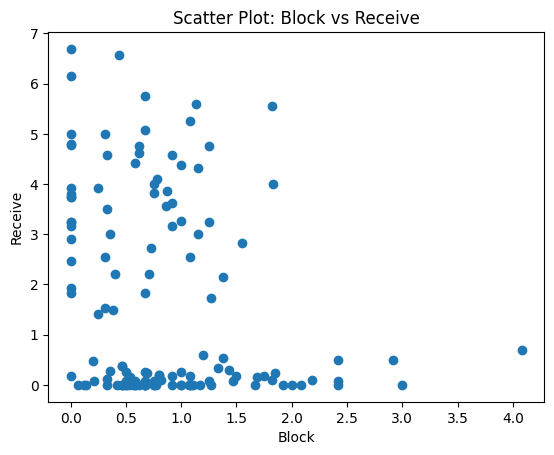

In [42]:
plt.scatter(df["Block"], df["Receive"])
plt.title("Scatter Plot: Block vs Receive")
plt.xlabel("Block")
plt.ylabel("Receive")
plt.show()

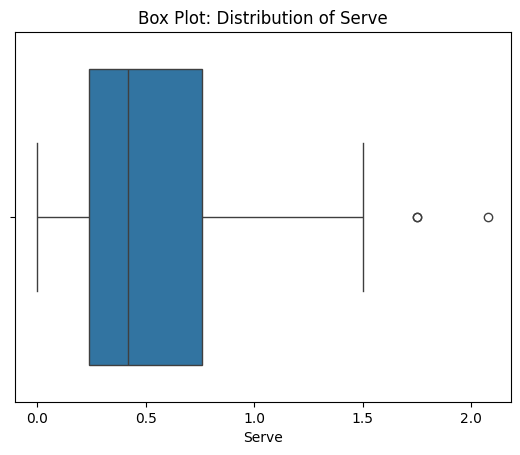

In [43]:
sns.boxplot(x=df["Serve"])
plt.title("Box Plot: Distribution of Serve")
plt.show()

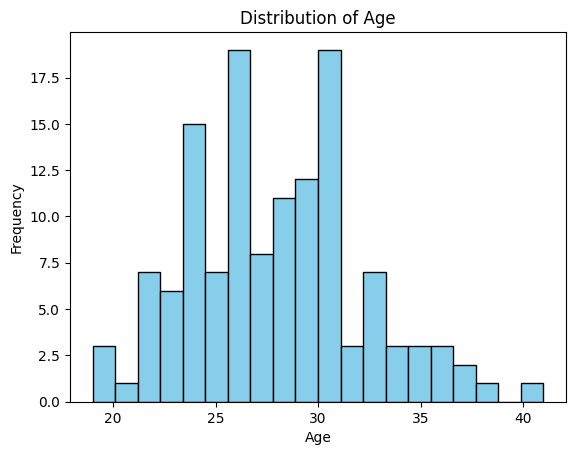

In [44]:
plt.hist(df["Age"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Position
OP    9.326000
OH    8.381667
MB    4.544688
S     0.536250
L     0.000000
Name: Attack, dtype: float64


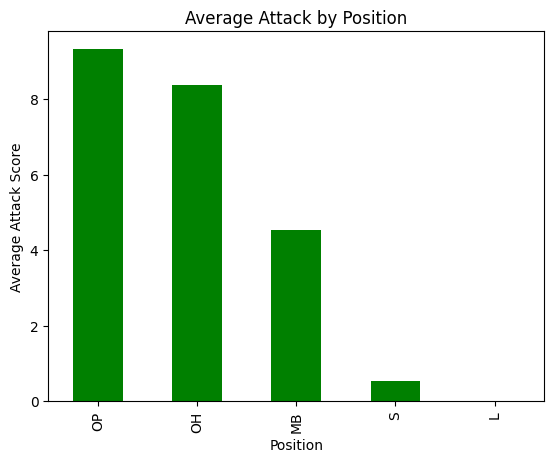

In [47]:
#Average Attack by position
avg_attack_by_position = df.groupby("Position")["Attack"].mean().sort_values(ascending=False)
print(avg_attack_by_position)

avg_attack_by_position.plot(kind="bar", color="green")
plt.title("Average Attack by Position")
plt.xlabel("Position")
plt.ylabel("Average Attack Score")
plt.show()

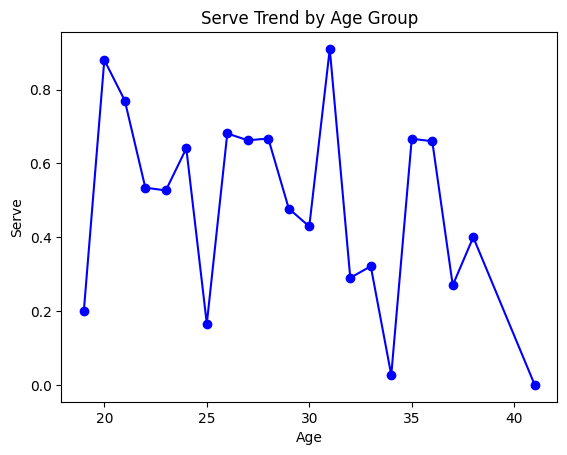

In [49]:
#Line plot for trend of serve over age groups
serve_trend_by_age = df.groupby("Age")["Serve"].mean()

serve_trend_by_age.plot(kind="line", marker="o", linestyle="-", color="blue")
plt.title("Serve Trend by Age Group")
plt.xlabel("Age")
plt.ylabel("Serve")
plt.show()

           Attack  Block
Country                 
France      66.70   9.08
Poland      58.07   8.18
Japan       52.76   4.41
Serbia      47.99   8.30
Italy       47.72  10.09
Slovenia    47.69   6.77
Argentina   47.40   8.48
Cuba        44.41   6.76
Iran        42.37   8.39
Bulgaria    42.26   5.96
Brazil      42.00   6.30
USA         41.40   6.85
Nederland   41.16   5.42
China       40.75   5.66
Germany     38.67   5.04
Canada      37.84   5.08


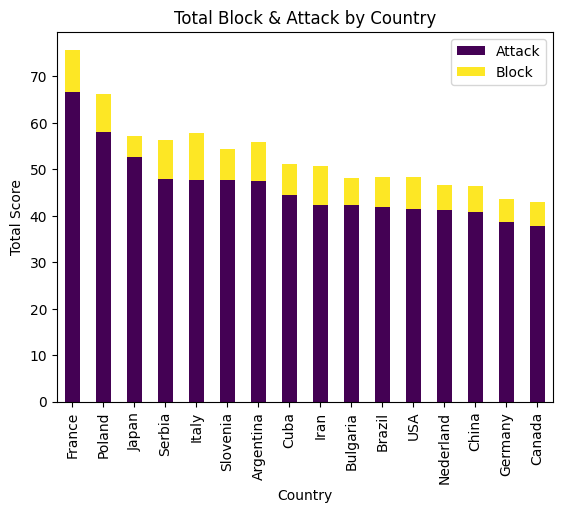

In [52]:
#Stacked Bar Chart of Block and Attack by Country
total_attack_block_by_country = df.groupby("Country")[["Attack", "Block"]].sum().sort_values(ascending=False, by="Attack")

print(total_attack_block_by_country)

total_attack_block_by_country.plot(kind="bar", stacked=True, colormap="viridis")
plt.title("Total Block & Attack by Country")
plt.xlabel("Country")
plt.ylabel("Total Score")
plt.show()